
# **Simple Linear Regression**


In this regression task we will predict the percentage of marks that a student  is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Importing libraries**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

**Reading Data**

In [73]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [74]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Plotting Distribution**

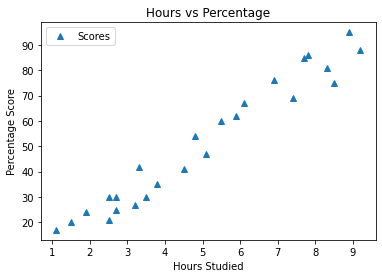

In [75]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='^')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# **Training**

In [76]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [77]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [78]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# **Plotting the regression line**

**Plotting training data**

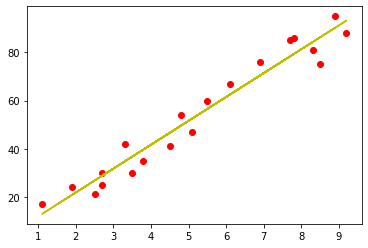

In [83]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for train data
plt.scatter(X_train, y_train,color="r")
plt.plot(X, line,color="y");
plt.show()

**Plotting testing data**

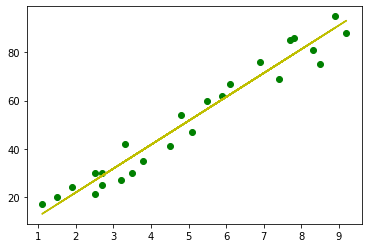

In [40]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color="g")
plt.plot(X, line,color="y");
plt.show()

# **Making Predictions**

In [65]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


# **Comparing actual vs predicted values**

In [66]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033
5,35,39.678655
6,24,20.848407


**Plot of actual vs predicted values**

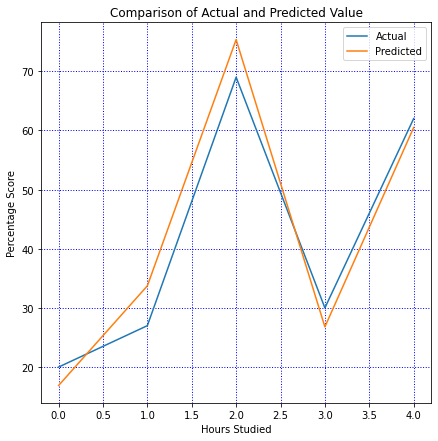

In [60]:
#Comparison of Actual and predicted value 
df.plot(kind='line',figsize=(7,7))
plt.title('Comparison of Actual and Predicted Value')
plt.grid(which='major',linestyle=':',linewidth='1',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='1',color='black')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

# **Predicted Score for 9.25 Hours**

In [48]:
# You can also test with your own data
hours=[[9.25]]
Prediction_score=regressor.predict(hours)
print("Number of hours :", hours)
print("predicted score :", Prediction_score)

Number of hours : [[9.25]]
predicted score : [93.69173249]


# **Evaluation**

Evaluation step is particularly important to compare performance of algorithms on a particular dataset. here, we have chosen the:
*    mean square error,
*    mean absolute error.


 

In [69]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


Mean Absolute Error: 4.1070781154621665
Mean Squared Error: 19.97374174850152
